In [4335]:
#AST,STL,REB,累積三隊,PTS,FG%,FT%,3P%,W,+/-
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4336]:
data = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/模型資料.csv')

In [4337]:

x = data.loc[:,['GP','W','L','MIN','PTS','FGA','FG%','3PA','3P%','FTA',
       'FT%','OREB','DREB','REB', 'AST','TOV', 'STL', 'BLK','PF','DD2','TD3',
       '+/-', '累積前三隊','勝率','DFG_percent','DIFF_percent', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
y = data.loc[:,'當年有無入選']

In [4338]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3,random_state=10,stratify=y.values)

In [4339]:
logistic = LogisticRegression(penalty = 'l2',class_weight=None,random_state=0)

In [4340]:
logistic.fit(x_train.values,y_train.values)

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [4341]:
proba = logistic.predict_proba(x_train.values)[:,1]

In [4342]:
pro = []
for x in proba:
    pro.append(round(x,2))
np.array(pro)

array([0., 0., 0., ..., 0., 0., 0.])

In [4343]:
df = pd.DataFrame([pro,y_train]).T

In [4344]:
df = pd.DataFrame(df.groupby(1)[0].value_counts())

In [4345]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify

<BarContainer object of 40 artists>

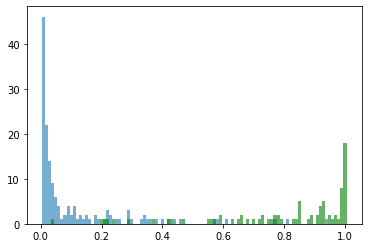

In [4346]:
plt.bar(df['opportunity'].values[np.where(df['classify'] == 0)[0][1:]],df[0].values[np.where(df['classify'] == 0)[0][1:]],width = 0.01,alpha = 0.6)
plt.bar(df['opportunity'].values[np.where(df['classify'] == 1)[0]],df[0].values[np.where(df['classify'] == 1)[0]],width = 0.01,alpha = 0.6,color = 'green')

In [4347]:
y_label = y_train.values
y_pre = pro
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [4348]:
#0.38
matrix = []
matrix_1 = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_train.values,l))
    p = pd.DataFrame(confusion_matrix(y_train.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
    matrix_1.append(p.values)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 2.0
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 1.0
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.99
          predict 0  predict 1
actual 0       2730          0
actual 1         62         22
thersholds: 0.98
          predict 0  predict 1
actual 0       2730          0
actual 1         57         27
thersholds: 0.97
          predict 0  predict 1
actual 0       2730          0
actual 1         56         28
thersholds: 0.96
          predict 0  predict 1
actual 0       2730          0
actual 1         55         29
thersholds: 0.95
          predict 0  predict 1
actual 0       2730          0
actual 1         53         31
thersholds: 0.94
          predict 0  predict 1
actual 0       2729          1
actual 1         52         32
thersholds: 0.93
          predict 0  predict 1
actual 0       2729          1
actual 1         49         35
thersholds: 

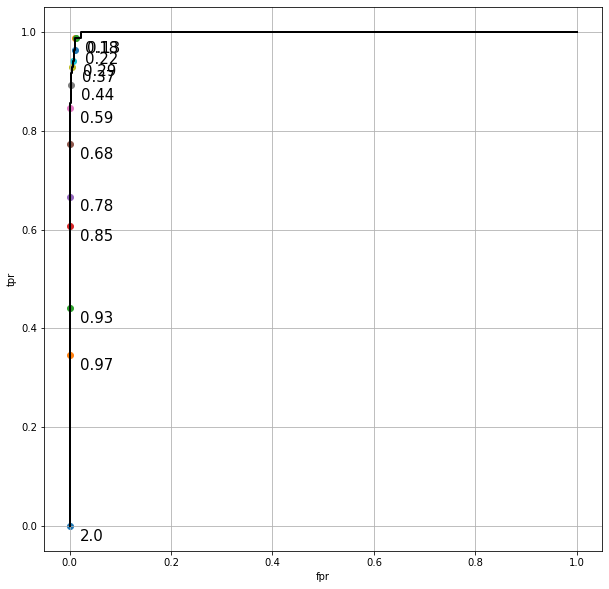

In [4349]:
plt.figure(figsize=(10,10))
plt.grid(which = 'both')
plt.step(fpr,tpr, 'k', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.xlabel("fpr")
plt.ylabel("tpr")
for x in range(0,52,4):
    plt.scatter(fpr[x],tpr[x])
    plt.text(fpr[x]+0.02,tpr[x]-0.03,thersholds[x],size=15)

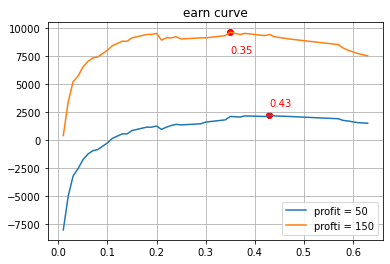

In [4350]:
profit_matrix = np.array([[0,-100],[-100,50]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.text(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]+800,color = 'red',s =thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]])
profit_matrix = np.array([[0,-100],[-150,150]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.text(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]-1900,color = 'red',s =thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]])

plt.title('earn curve')
plt.legend(['profit = 50','profti = 150'])
plt.grid()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[[   0 -100]\n [-150  150]]')

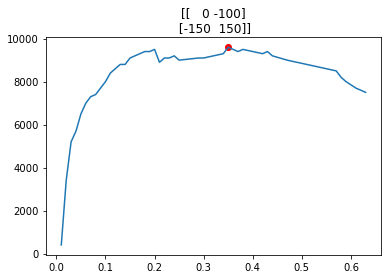

In [4351]:
profit_matrix = np.array([[0,-100],[-150,150]])
earn = []
for x in matrix_1:
    earn.append(np.sum(x * profit_matrix))
plt.plot(thersholds[::-1][1:40],earn[::-1][1:40])
plt.scatter(thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],earn[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]],color = 'red')
plt.title(profit_matrix)

In [4352]:
thersholds[::-1][np.where(earn[::-1] == max(earn[::-1]))[0][0]]

0.35

In [4353]:
prob_1 = logistic.predict_proba(x_test)[:,1]

In [4354]:
df = pd.DataFrame([y_test.values,prob_1]).T
prob = []
for x in df[1].values:
    prob.append(round(x,2))
df['prob'] = prob

In [4355]:
df = pd.DataFrame(df.groupby(0)['prob'].value_counts())

In [4356]:
opportunity = []
classify = []
for x in  df.index:
    opportunity.append(x[1])
    classify.append(x[0])
df['opportunity'] = opportunity
df['classify'] = classify
df

prob  opportunity  classify
0   prob                             
0.0 0.00  1087         0.00       0.0
    0.01    23         0.01       0.0
    0.02     9         0.02       0.0
    0.03     7         0.03       0.0
    0.10     4         0.10       0.0
    0.05     3         0.05       0.0
    0.09     3         0.09       0.0
    0.41     3         0.41       0.0
    0.04     2         0.04       0.0
    0.06     2         0.06       0.0
    0.12     2         0.12       0.0
    0.13     2         0.13       0.0
    0.14     2         0.14       0.0
    0.16     2         0.16       0.0
    0.18     2         0.18       0.0
    0.35     2         0.35       0.0
    0.40     2         0.40       0.0
    0.08     1         0.08       0.0
    0.11     1         0.11       0.0
    0.15     1         0.15       0.0
    0.19     1         0.19       0.0
    0.27     1         0.27       0.0
    0.36     1         0.36       0.0
    0.38     1         0.38       0.0
    0.42     1         0.42       0.0
    0.48     1         0.48       0.0
    0.54     1         0.54       0.0
    0.65     1         0.65       0.0
    0.69     1         0.69       0.0
    0.80     1         0.80       0.0
    0.84     1         0.84       0.0
1.0 1.00     8         1.00       1.0
    0.85     2         0.85       1.0
    0.91     2         0.91       1.0
    0.94     2         0.94       1.0
    0.97     2         0.97       1.0
    0.03     1         0.03       1.0
    0.13     1         0.13       1.0
    0.18     1         0.18       1.0
    0.21     1         0.21       1.0
    0.22     1         0.22       1.0
    0.26     1         0.26       1.0
    0.27     1         0.27       1.0
    0.36     1         0.36       1.0
    0.39     1         0.39       1.0
    0.43     1         0.43       1.0
    0.44     1         0.44       1.0
    0.61     1         0.61       1.0
    0.72     1         0.72       1.0
    0.73     1         0.73       1.0
    0.88     1         0.88       1.0
    0.90     1         0.90       1.0
    0.92     1         0.92       1.0
    0.96     1         0.96       1.0
    0.98     1         0.98       1.0
    0.99     1         0.99       1.0

<BarContainer object of 25 artists>

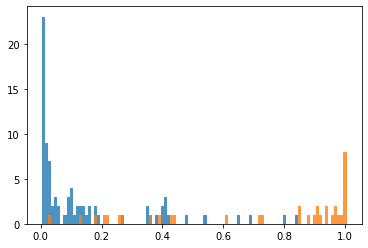

In [4357]:
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 0)[0][1:]],df['prob'].values[np.where(df['classify'].values == 0)[0][1:]],width = 0.01,alpha = 0.8)
plt.bar(df['opportunity'].values[np.where(df['classify'].values == 1)[0]],df['prob'].values[np.where(df['classify'].values== 1)[0]],width = 0.01,alpha = 0.8)

In [4358]:
y_label = y_test.values
y_pre = prob_1
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)

In [4359]:
matrix = []
for x,y,z in zip(fpr,tpr,thersholds):
    l = []
    for m in proba:
        if m < z:
            l.append(0)
        else:
            l.append(1)
    matrix.append(confusion_matrix(y_train.values,l))
    p = pd.DataFrame(confusion_matrix(y_train.values,l),index = ["actual 0","actual 1"],columns=["predict 0","predict 1"])
    print("thersholds:",z)
    print(p)
roc_auc = auc(fpr, tpr)
print("auc",roc_auc)

thersholds: 1.9999834804968124
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.9999834804968125
          predict 0  predict 1
actual 0       2730          0
actual 1         84          0
thersholds: 0.8475678263357098
          predict 0  predict 1
actual 0       2729          1
actual 1         34         50
thersholds: 0.8047851045268345
          predict 0  predict 1
actual 0       2728          2
actual 1         31         53
thersholds: 0.7243485103653886
          predict 0  predict 1
actual 0       2727          3
actual 1         22         62
thersholds: 0.6456219659165314
          predict 0  predict 1
actual 0       2727          3
actual 1         16         68
thersholds: 0.6083901621453053
          predict 0  predict 1
actual 0       2726          4
actual 1         15         69
thersholds: 0.4760122399487234
          predict 0  predict 1
actual 0       2724          6
actual 1         10         74
thershol

In [4360]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/NBA/資料/今年資料.csv')
df

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,position,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F
0,0.938670,1.489091,0.065084,1.518321,3.519689,2.648595,0.497309,0.416571,0.581259,6.289735,...,C-F,C-F,0,0,1,0,0,0,0,0
1,0.458649,0.169472,0.645377,1.878668,3.471913,3.107778,0.703385,2.314415,0.492559,2.682395,...,F,F,0,0,0,1,0,0,0,0
2,0.898668,1.489091,-0.007452,1.422935,3.408213,2.439875,0.942435,0.372435,0.004708,6.040953,...,F,F,0,0,0,1,0,0,0,0
3,0.418648,0.895262,-0.225062,1.878668,3.408213,2.794699,0.653927,1.211017,0.669959,3.553132,...,F,F,0,0,0,1,0,0,0,0
4,0.818665,1.423110,-0.079989,1.687896,3.169335,3.066034,0.151100,2.667503,0.448209,3.615328,...,F-G,F-G,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.621438,-1.480053,-1.313111,-1.523438,-1.353425,-1.275334,-3.615985,-0.995779,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
580,-1.661440,-1.282110,-1.603257,-1.788400,-1.353425,-1.379694,-3.615985,-1.216459,-2.161053,-0.613968,...,C,C,0,1,0,0,0,0,0,0
581,-1.741443,-1.414072,-1.603257,-1.851991,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0
582,-1.741443,-1.414072,-1.603257,-1.968574,-1.353425,-1.442310,-3.615985,-1.216459,-2.161053,-1.049336,...,F,F,0,0,0,1,0,0,0,0


In [4361]:
x = df.loc[:,['GP','W','L','MIN','PTS','FGA','FG%','3PA','3P%','FTA',
       'FT%','OREB','DREB','REB', 'AST','TOV', 'STL', 'BLK','PF','DD2','TD3',
       '+/-', '累積前三隊','勝率','DFG_percent','DIFF_percent', 'C', 'C-F', 'F', 'F-C', 'F-G',
       'G', 'G-F']]
x = x.dropna()

In [4362]:
proba = logistic.predict_proba(x.values)[:,1]

In [4363]:
df = df.dropna()
df['prob'] = proba

In [4364]:
y = df.groupby("Final_Position")
for z,m in y:
    print(z)
    print(y.get_group(z).sort_values('prob',ascending=False).head(8).loc[:,['Player','prob',"PTS",'AST','REB']])

C
                Player      prob       PTS       AST       REB
9         Nikola Jokic  0.996411  2.962307  3.252996  4.324829
81         Rudy Gobert  0.660169  1.130908 -0.451069  4.704932
64       Deandre Ayton  0.127874  1.385711 -0.287655  2.804417
75       Jarrett Allen  0.060699  1.210534 -0.178711  3.057819
56      Nikola Vucevic  0.020713  1.449412  0.692833  3.142286
108       Jakob Poeltl  0.017225  0.796479  0.474947  2.424314
55   Jonas Valanciunas  0.011948  1.481262  0.366004  3.311221
92         Evan Mobley  0.010687  1.035357  0.311532  2.001977
C-F
                  Player      prob       PTS       AST       REB
0            Joel Embiid  0.998576  3.519689  1.237549  3.437922
14    Karl-Anthony Towns  0.561099  2.564177  0.910719  2.635482
43           Bam Adebayo  0.020368  1.688290  0.801776  2.762183
186  Robert Williams III  0.002862  0.239096  0.039175  2.551015
178           Al Horford  0.000800  0.270947  0.801776  1.748575
206         JaVale McGee  0.000494  0

In [4365]:
df[df['Player'] == 'Stephen Curry']

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
13,0.778663,1.489091,-0.225062,1.59251,2.707504,2.544235,-0.013762,3.947444,0.647784,1.873853,...,G,0,0,0,0,0,0,1,0,0.808739


In [4366]:
df[df['Player'] == 'Ja Morant']

,GP,W,L,MIN,PTS,FGA,FG%,3PA,3P%,FTA,...,Final_Position,是否首次入選,C,C-F,F,F-C,F-G,G,G-F,prob
8,0.498651,0.895262,-0.079989,1.444131,3.010082,2.857315,0.44785,0.769658,0.381684,3.490937,...,G,0,0,0,0,0,0,1,0,0.870571


In [4367]:
df.sort_values('prob',ascending=False).head(20).loc[:,['Player','prob']]

,Player,prob
2,Giannis Antetokounmpo,0.999749
0,Joel Embiid,0.998576
9,Nikola Jokic,0.996411
5,Trae Young,0.977646
3,Kevin Durant,0.976448
4,Luka Doncic,0.963687
11,Devin Booker,0.955928
96,Chris Paul,0.946709
10,Jayson Tatum,0.914393
8,Ja Morant,0.870571
